# CAR PRICE PREDICTION

#### Car price prediction plays a crucial role in the automotive industry for several reasons:

Consumer Decision Making: Predicting car prices helps consumers make informed decisions about purchasing vehicles. It enables them to budget effectively and compare prices across different models and brands.

Market Competitiveness: For automakers and dealerships, accurate price prediction is essential for remaining competitive in the market. Understanding pricing trends and consumer demand allows them to adjust prices accordingly to attract customers and optimize sales.

Inventory Management: Car dealerships need to manage their inventory effectively to ensure they have the right mix of vehicles available to meet customer demand. Price prediction helps them determine which cars to stock and when to adjust inventory levels based on predicted pricing trends.

Financial Planning: For financial institutions and lenders, accurate car price prediction is vital for assessing the value of vehicles used as collateral for loans and leases. It helps mitigate risks associated with lending and ensures fair pricing for both parties.

Forecasting: Predicting car prices also aids in forecasting future market trends and developments. This insight allows stakeholders to anticipate changes in demand, supply, and pricing, enabling them to make strategic decisions to stay ahead in the competitive automotive industry.


### Description:
The objective of this dataset is to predict car prices based on certain diagnostic measurements included in the dataset.The dataset consists of several car predictor variables and one target variable 'selling_price'. Predictor variables includes year, km_driven, fuel, seller_type, transmission, owner, etc

Dataset URL: https://github.com/KajalPardeshi/Car-Price-Prediction

I have used various Machine Learning Algorithms to predict car prices and selected the best ML model whose accuracy score is highest of all.

# Step 0: Importing Libraries and Dataset 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso,BayesianRidge, ARDRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
dataset = pd.read_csv("Car Dataset.csv")

# Step 1: Descriptive Statistics

In [3]:
#Preview data
dataset.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
# Dataset dimensions (rows, columns)
dataset.shape

(4340, 8)

In [5]:
# Features (columns) data-types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# Checking the number of missing values
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


# Observations:
1. There are total 4340 records and 8 features in the dataset.
2. Each feature is either an integer or object data type.
3. There are zero NaN values in the dataset.


# Step 2: Data Preprocessing

In [8]:
# Checking the distribution of Categorical data
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [9]:
data = dataset.copy()

In [10]:
# Statistical Summary
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [11]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Encoding the Categorical Data 

#### fuel, seller_type, transmission, owner 
All these columns are categorical which should be converted to dummy variables before being used.

In [12]:
# data = pd.get_dummies(data, columns = ["fuel", "seller_type", "transmission", "owner"], drop_first = True)

# Encoding "fuel" column
data.replace({'fuel': {'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace=True)

# Encoding "seller_type" column
data.replace({'seller_type': {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace=True)

# Encoding "transmission" column
data.replace({'transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

# Encoding "owner" column
data.replace({'owner': {'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

In [13]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [14]:
df = data.drop(['name'], axis=1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,1,0,0,0
1,2007,135000,50000,1,0,0,0
2,2012,600000,100000,0,0,0,0
3,2017,250000,46000,1,0,0,0
4,2014,450000,141000,0,0,0,1
...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,1
4336,2014,409999,80000,0,0,0,1
4337,2009,110000,83000,1,0,0,1
4338,2016,865000,90000,0,0,0,0


In [15]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,0.524424,0.276037,0.103226,0.46659
std,4.215344,5.785487e+05,46644.102194,0.549971,0.496892,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.00000
50%,2014.000000,3.500000e+05,60000.000000,1.000000,0.000000,0.000000,0.00000
75%,2016.000000,6.000000e+05,90000.000000,1.000000,1.000000,0.000000,1.00000
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.00000


1. It has been observed that 75% of the cars are having selling price of upto 6 lakhs and selling price of cars is very high as compared to the average selling price.
2. It means that there are some outliers in the dataset
3. Therefore, I will consider only those records where selling price is less than 50 lakhs.

In [16]:
df = df[df['selling_price']<5e6].reset_index(drop=True)

In [17]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,1,0,0,0
1,2007,135000,50000,1,0,0,0
2,2012,600000,100000,0,0,0,0
3,2017,250000,46000,1,0,0,0
4,2014,450000,141000,0,0,0,1
...,...,...,...,...,...,...,...
4332,2014,409999,80000,0,0,0,1
4333,2014,409999,80000,0,0,0,1
4334,2009,110000,83000,1,0,0,1
4335,2016,865000,90000,0,0,0,0


In [18]:
# Storing the cleaned data in a separate excel sheet
df.to_csv('Cleaned_Car.csv')

# Step 3: Data Visualization

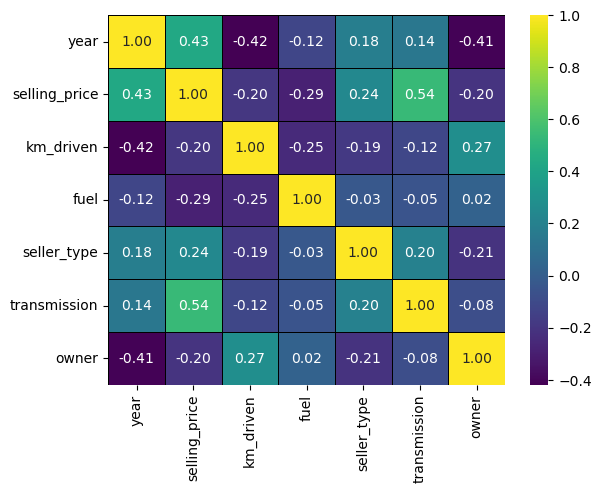

In [19]:
# Heatmap
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f', cbar=True, linewidths=0.6, linecolor='Black')
plt.show()

### Observations:
From the heatmap we can see that there is a high correlation between selling_price and [year, transmission, seller_type] columns. The other columns such as fuel, km_driven and owner may also have an impact on the price of cars.

Therefore, I have selected the 'year', 'km_driven', 'fuel', 'seller_type', 'transmission' and 'owner' columns as features of the dataset. 

### Selecting features and target

In [20]:
# Splitting the features and target
X = df.drop(['selling_price'], axis=1)
Y = df['selling_price']

In [21]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,0,0
1,2007,50000,1,0,0,0
2,2012,100000,0,0,0,0
3,2017,46000,1,0,0,0
4,2014,141000,0,0,0,1
...,...,...,...,...,...,...
4332,2014,80000,0,0,0,1
4333,2014,80000,0,0,0,1
4334,2009,83000,1,0,0,1
4335,2016,90000,0,0,0,0


### Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3469, 6)
X_test shape: (868, 6)
Y_train shape: (3469,)
Y_test shape: (868,)


In [24]:
# Another way to encode categorical columns - using One-hot Encoding technique
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(X[['fuel', 'seller_type', 'transmission', 'owner']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['fuel', 'seller_type', 'transmission', 'owner']), remainder='passthrough')

### Feature Scaling

Feature scaling is a preprocessing technique used to standardize or normalize the range of independent variables or features of a dataset. It's an important step in many machine learning algorithms to ensure that features contribute equally to the computation and optimization process.

#### Standardization (Z-score normalization):
In standardization, each feature is rescaled so that it has the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.
It centers the distribution of each feature around zero and scales them to have unit variance.
Standardization is useful when features have different scales or when the algorithm assumes that features are normally distributed.
It preserves the shape of the original distribution and is less affected by outliers compared to min-max scaling.
Commonly used in algorithms like logistic regression, support vector machines, and k-nearest neighbors.

In [25]:
# Feature scaling using Standardization
Scaler = StandardScaler()
Scaler.fit(X_train)
Scaler.fit(X_test)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

# Step 4: Data Modelling

### 1. Linear Regression
Linear regression is a fundamental statistical technique used for modeling the relationship between a dependent variable (target variable) and one or more independent variables (predictor variables). It assumes a linear relationship between the predictor variables and the target variable.

In [26]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

### 2. Random Forest  
Random Forest Regression is an ensemble learning technique that combines the predictions of multiple decision tree regressors to improve the accuracy and robustness of the model. It belongs to the family of tree-based methods and is widely used for regression tasks.

In [27]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error')
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

### 3. Decision Tree 
Decision Tree Regression is a supervised learning algorithm used for regression tasks. It works by recursively partitioning the input space into regions and predicting the target variable based on the average of the target values in each region. Unlike classification trees, which predict categorical outcomes, decision tree regression predicts continuous numerical values.

In [28]:
dtr = DecisionTreeRegressor(criterion = 'squared_error',max_depth=2)
dtr.fit(X_train, Y_train)
y_pred_dtr = dtr.predict(X_test)

### 4. Lasso Regression 
Lasso Regression, also known as L1 regularization, is a linear regression technique that incorporates regularization to prevent overfitting and encourage sparsity in the coefficients. It adds a penalty term to the standard linear regression objective function, which penalizes the absolute values of the coefficients.

In [29]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
y_pred_lasso_reg = lasso_reg.predict(X_test)

### 5. Support Vector Regression
Support Vector Regression (SVR) is a regression algorithm that extends the concepts of Support Vector Machines (SVMs) to solve regression problems. It works by finding a hyperplane in a high-dimensional feature space that has the maximum margin to the training data points while still fitting the data within a specified tolerance. SVR is effective for handling non-linear relationships and is robust to outliers.

In [30]:
svr = SVR(kernel='linear')  
svr.fit(X_train, Y_train)  
y_pred_svr = svr.predict(X_test)

### 6. Bayesian Ridge Regression
Bayesian Ridge Regression is a regression algorithm that applies Bayesian inference to linear regression models. It combines the principles of Bayesian statistics with linear regression to estimate the parameters of the regression model, including the coefficients and the noise variance. Bayesian Ridge Regression provides a probabilistic framework for estimating the uncertainty associated with the regression coefficients, which can be useful for making predictions and understanding the reliability of the model.

In [31]:
br = BayesianRidge(n_iter=400)
br.fit(X_train, Y_train)
y_pred_br = br.predict(X_test)

### 7. Bayesian ARD Regression
Bayesian Automatic Relevance Determination (ARD) Regression is a variant of Bayesian Ridge Regression that automatically determines the relevance of each feature in the regression model. It extends the Bayesian Ridge Regression by introducing different hyperparameters for each feature, allowing the model to adaptively shrink or expand the coefficients of each feature based on their relevance to the target variable.

In [32]:
bar = ARDRegression(n_iter=400)
bar.fit(X_train, Y_train)
y_pred_bar = bar.predict(X_test)

### 8. Gradient Boosting Regression 
Gradient Boosting Regression is a powerful ensemble learning technique used for regression tasks. It builds a predictive model by combining the predictions of multiple individual regression models, typically decision trees, in a sequential manner. Unlike bagging methods like Random Forest, gradient boosting builds trees sequentially, with each tree learning from the errors of the previous ones.

In [33]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
y_pred_gbr = gbr.predict(X_test)

### 9. XGBoost Regression
XGBoost (Extreme Gradient Boosting) is a scalable and efficient implementation of gradient boosting algorithms, which is widely used for regression tasks. It extends the gradient boosting framework with several enhancements, including parallelization, regularization, and tree-pruning algorithms, to improve performance and accuracy.

In [34]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

# Step 5: Model Evaluation

In [35]:
# Evaluating using r2_score metric
from sklearn.metrics import r2_score
r2score_lr = r2_score(Y_test, y_pred_lr)
r2score_rf = r2_score(Y_test, y_pred_rf)
r2score_dtr = r2_score(Y_test, y_pred_dtr)
r2score_lasso_reg = r2_score(Y_test, y_pred_lasso_reg)
r2score_svr = r2_score(Y_test, y_pred_svr)
r2score_br = r2_score(Y_test, y_pred_br)
r2score_bar = r2_score(Y_test, y_pred_bar)
r2score_gbr = r2_score(Y_test, y_pred_gbr)
r2score_xgb = r2_score(Y_test, y_pred_xgb)

In [36]:
# R2 Score on test set
print(f"Linear Regression: {r2score_lr}")
print(f"Random Forest: {r2score_rf}")
print(f"Decision tree: {r2score_dtr}")
print(f"Lasso Regression: {r2score_lasso_reg}")
print(f"Support Vector Regressor: {r2score_svr}")
print(f"Bayesian Ridge Regression: {r2score_br}")
print(f"Bayesian ARD Regression: {r2score_bar}")
print(f"Gradient Boosting Regression: {r2score_gbr}")
print(f"XGBoost Regression: {r2score_xgb}")

Linear Regression: 0.36769944626953766
Random Forest: 0.7664418365530945
Decision tree: 0.37913140243789967
Lasso Regression: 0.36769950397244777
Support Vector Regressor: -0.028840133519968836
Bayesian Ridge Regression: 0.3682554226755016
Bayesian ARD Regression: 0.36247160259731726
Gradient Boosting Regression: 0.6840587103877487
XGBoost Regression: 0.7388572358266694


# Conclusion:
It has been observed that out of the 9 ML algorithms, Random Forest Algorithm has the highest R2 score of 0.76.

Therefore, we will choose the Random Forest algorithm to train our model as it can yield more accurate car price predictions.